<a href="https://colab.research.google.com/github/gmehra123/course1/blob/master/Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sampling Introduction
* Best way to get details of a pop. is to do a census
* Highly expensive approach.
* You can use a subset of the population called a sample
* *population* is the complete set of data we are interested in.
* *Sample* Is a subset of the population. The population is almost never available to us so we have to infer insights about the populkation from the sample
* *Samples* have statistics and *populations* have parameters
* Sample has to be representative of the population as a whole. 
  * A method of sampling has to be used that will have response rates from all sections of the population.
  * In many cases convenient sampling methods are used which dont yield reponse rates that are representative of the population
  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
spotify=pd.read_feather('https://assets.datacamp.com/production/repositories/5975/datasets/18d07c39535b900b64dc145985d9e8dfbf2ca498/spotify_2000_2020.feather')

In [3]:
spotify.duration_minutes.describe()

count    41656.000000
mean         3.852152
std          1.505201
min          0.505017
25%          3.197333
50%          3.704883
75%          4.290450
max         90.058333
Name: duration_minutes, dtype: float64

In [4]:
sims=1000
samp=np.empty(sims)
for i in range(sims):
  sample=spotify.duration_minutes.sample(n=len(spotify.duration_minutes),replace=True)
  mean=sample.mean()
  samp[i]=mean

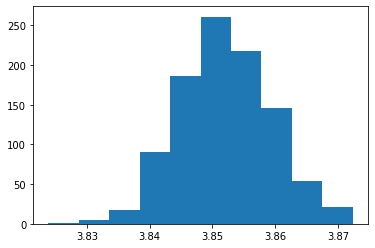

In [5]:
plt.hist(samp)
plt.show()

## Pseudo random number generation
* Pseudo random number generation is cheap and fast.
* Generally generates the next random number from the previous one
* It has to start somewhere and this is called the seed
* numpy has many functions to generate random numbers from each stat distribution
  * np.random.normal 
  * np.random.binomial
  * np.random.uniform
* use np.random.seed() for reproducibility

## Startified Sampling
* You can pre-group the data into strata or groups before sampling. Coffees by country. Customers by channel etc.
* In this case you can use a groupby and chain the sample method to it. This way you get a propotionate sample
* You can also get equal proportion of samples from each group
* You can also do weighted startified sampling. In this case if you have an underreprented group with fewer rows in the data you can weight your sample in a way that pulls more from them.
* Another type of sampling is Cluster sampling
  * In cluster sampling you sample at 2 levels.
  * First you randomly select n clusters.
  * Then you do stratified random sampling on those clusters

In [6]:
coffee=pd.read_feather('https://assets.datacamp.com/production/repositories/5975/datasets/17ec88d6bf920ba7f159298d6acba118a907dacf/coffee_ratings_full.feather')

In [7]:
coffee.country_of_origin.value_counts()

Mexico                          236
Colombia                        183
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         52
Costa Rica                       51
Ethiopia                         44
Tanzania, United Republic Of     40
Uganda                           36
Thailand                         32
Nicaragua                        26
Kenya                            25
El Salvador                      21
Indonesia                        20
China                            16
India                            14
Malawi                           11
United States                    10
Peru                             10
Myanmar                           8
Vietnam                           8
Haiti                             6
Philippines                       5
United States (Puerto Rico)       4
Panama                            4
Ecuador                     

In [8]:
countries=['Mexico','Colombia','Guatemala','Brazil']
coffee2=coffee.loc[coffee.country_of_origin.isin(countries),:]

In [9]:
coffee2.country_of_origin.value_counts(normalize=True)*100

Mexico       32.240437
Colombia     25.000000
Guatemala    24.726776
Brazil       18.032787
Name: country_of_origin, dtype: float64

In [10]:
#Startified sampling that preserves the proportion as per the population proportion
samp=coffee2.groupby('country_of_origin').sample(frac=0.1,random_state=35)
samp.country_of_origin.value_counts(normalize=True)*100

Mexico       32.876712
Colombia     24.657534
Guatemala    24.657534
Brazil       17.808219
Name: country_of_origin, dtype: float64

In [11]:
#Equally weighted stratified sample
samp2=coffee2.groupby('country_of_origin').sample(n=15,random_state=35)
samp2.country_of_origin.value_counts(normalize=True)*100

Brazil       25.0
Colombia     25.0
Guatemala    25.0
Mexico       25.0
Name: country_of_origin, dtype: float64

In [12]:
#We can do weighted random sampling, giving a value more weightage
condition=coffee2.country_of_origin=='Colombia'
coffee2['weights']=np.where(condition,2,1)
samp3=coffee2.sample(frac=0.1,weights='weights')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
samp3.country_of_origin.value_counts(normalize=True)

Colombia     0.356164
Mexico       0.260274
Guatemala    0.260274
Brazil       0.123288
Name: country_of_origin, dtype: float64

In [35]:
import random
country=list(coffee.country_of_origin.unique())
country_sam=random.sample(country,k=3)

In [36]:
coffee_cluster=coffee.loc[coffee.country_of_origin.isin(country_sam),:].copy()

In [37]:
coffee_cluster['country_of_origin']=coffee_cluster['country_of_origin'].astype('category')
coffee_cluster['country_of_origin']=coffee_cluster['country_of_origin'].cat.remove_unused_categories()

In [38]:
coffee_cluster

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
61,85.75,Arabica,"colbran coffeelands, ltd.",Papua New Guinea,tairora cherry – bonta,None,baroida,25072012,cqi,1700 mts,...,Bluish-Green,1.0,"October 25th, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1700.00,1700.00,1700.00
303,83.75,Arabica,german negron,United States (Puerto Rico),hacienda caracolillo,None,hacienda alto grande,None,"hacienda alto grande, llc.",2800 ft,...,Green,1.0,"June 9th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,853.44,853.44,853.44
509,83.00,Arabica,german negron,United States (Puerto Rico),hacienda caracolillo,None,hacienda alto grande,None,"hacienda alto grande, llc.",2800 ft,...,Bluish-Green,0.0,"June 9th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,853.44,853.44,853.44
992,81.08,Arabica,german negron,United States (Puerto Rico),hacienda caracolillo,None,hacienda alto grande,None,"hacienda alto grande, llc.",2800 ft,...,Green,0.0,"May 28th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,853.44,853.44,853.44
1193,79.08,Arabica,german negron,United States (Puerto Rico),hacienda caracolillo,None,hacienda alto grande,None,"hacienda alto grande, llc.",2800 ft,...,Green,0.0,"June 9th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,853.44,853.44,853.44
1260,76.83,Arabica,joshua marsceau,India,None,14/7/2015/172,"aspinwall & co. ltd, mangalore",14/7/2015/172,olam japan,None,...,Green,0.0,"January 16th, 2018",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,NaN,NaN,NaN
1311,83.50,Robusta,nishant gurjer,India,sethuraman estate kaapi royale,25,sethuraman estate,14/1148/2017/21,kaapi royale,3170,...,None,2.0,"October 31st, 2018",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,3170.00,3170.00,3170.00
1312,83.25,Robusta,andrew hetzel,India,sethuraman estate,None,None,0000,sethuraman estate,1000m,...,Green,0.0,"April 29th, 2016",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,1000.00,1000.00,1000.00
1315,82.75,Robusta,andrew hetzel,India,None,None,(self),None,"cafemakers, llc",3000',...,Green,0.0,"February 28th, 2013",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,3000.00,3000.00,3000.00
1316,82.58,Robusta,andrew hetzel,India,sethuraman estates,None,None,None,cafemakers,750m,...,Green,0.0,"May 15th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,750.00,750.00,750.00


In [39]:
coffee_cluster.groupby('country_of_origin')['owner'].count()

country_of_origin
India                          14
Papua New Guinea                1
United States (Puerto Rico)     4
Name: owner, dtype: int64

In [43]:
coffee_samp=coffee_cluster.groupby('country_of_origin').sample(frac=0.1,random_state=2022)

In [44]:
coffee_samp

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1315,82.75,Robusta,andrew hetzel,India,None,None,(self),None,"cafemakers, llc",3000',...,Green,0.0,"February 28th, 2013",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,3000.0,3000.0,3000.0


In [45]:
coffee.total_cup_points.mean()

82.15120328849028

### Error of point estimates
* Larger unbiased samples yield more accurate sample statistics.
* Accuracy is measured by closeness to the population parameter. sample statistic-pop parameter has to be 0 in the ideal case.
* Relative error=100*abs(pop param-sample_stat)/pop_parameter
* Increasing the number of replicates only leads to a more normal distributions, it does not change the relative error much.
* Relative error is increased by increasing the sample size
* Standard Deviation of the sampling distribution has a special name the *Standard error* 
* **Bootstrapping** 
  * Is essentially building up a theoretical population from a large sample.
  * In our case we treated the coffee dataset as the whole population of coffeess, which it is not.
  * If we treat it as a large sample then we can resample with replacement to build up a picture of the population as a whole.
  * **Bootstrapping cannot correct for any biases from sampling** 
